In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pathlib

<AxesSubplot:>

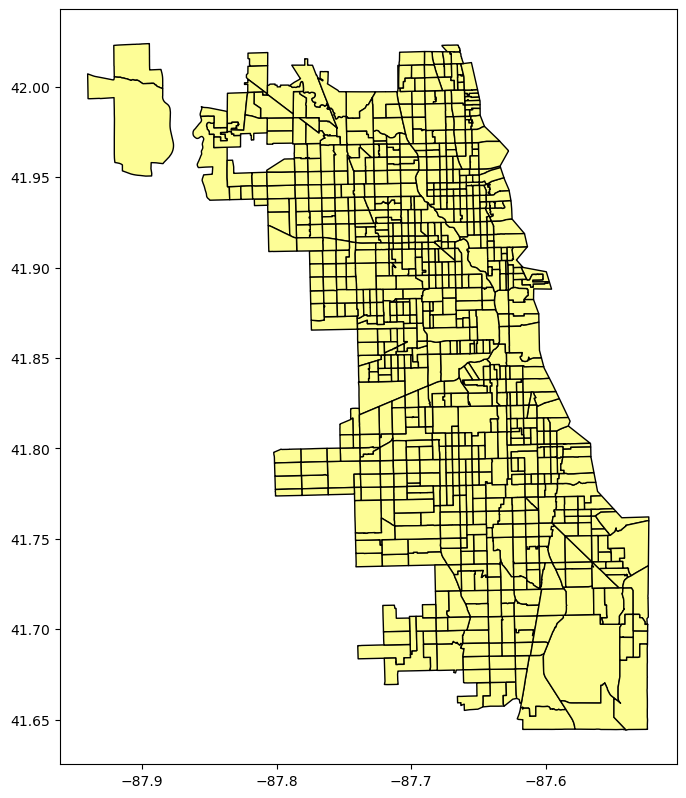

In [6]:
### Chicago Census Tract Boundaries
filename = 'data/Boundaries - Census Tracts - 2010-2/geo_export_956feb14-3473-4b2f-9559-8084b55ff017.shp'
tract_df = gpd.read_file(filename)
#tract_df.rename(columns={'geoid10': 'geocode'}, inplace=True)
#tract_df.set_index('geocode')

fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='#FDFD96', edgecolor='black')  

In [4]:
tract_df.head()

,commarea,commarea_n,countyfp10,geocode,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


### Public Charging Stations (Non Tesla Super Charger)

In [7]:
cstat_df = pd.read_csv('data/EV_stations_IL/alt_fuel_stations_clean_NotTesla (Jan 20 2023).csv')
cstat_gdf = gpd.GeoDataFrame(cstat_df, geometry=gpd.points_from_xy(cstat_df.Longitude, cstat_df.Latitude))
cstat_gdf.crs = {'init': 'epsg:4326'}


/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
cstat_gdf.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry
0,ELEC,61761,Public,24 hours daily,2,0,Non-Networked,GPS,40.507796,-88.982897,J1772,POINT (-88.98290 40.50780)
1,ELEC,61761,Public,24 hours daily,3,0,Non-Networked,GPS,40.511172,-88.984985,J1772,POINT (-88.98498 40.51117)
2,ELEC,60666,Public - Credit card at all times,24 hours daily; pay lot,6,0,Non-Networked,GPS,41.978506,-87.903280,J1772,POINT (-87.90328 41.97851)
3,ELEC,61761,Public,24 hours daily,1,0,Non-Networked,200-8,40.496969,-89.004735,J1772,POINT (-89.00473 40.49697)
4,ELEC,61761,Public,24 hours daily; pay lot; Drivers must bring th...,2,0,Non-Networked,GPS,40.507954,-88.986429,J1772 NEMA520,POINT (-88.98643 40.50795)


In [5]:
cstat_gdf.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry
0,ELEC,61761,Public,24 hours daily,2,0,Non-Networked,GPS,40.507796,-88.982897,J1772,POINT (-88.98290 40.50780)
1,ELEC,61761,Public,24 hours daily,3,0,Non-Networked,GPS,40.511172,-88.984985,J1772,POINT (-88.98498 40.51117)
2,ELEC,60666,Public - Credit card at all times,24 hours daily; pay lot,6,0,Non-Networked,GPS,41.978506,-87.903280,J1772,POINT (-87.90328 41.97851)
3,ELEC,61761,Public,24 hours daily,1,0,Non-Networked,200-8,40.496969,-89.004735,J1772,POINT (-89.00473 40.49697)
4,ELEC,61761,Public,24 hours daily; pay lot; Drivers must bring th...,2,0,Non-Networked,GPS,40.507954,-88.986429,J1772 NEMA520,POINT (-88.98643 40.50795)


In [13]:
cstat_gdf.rename(columns={'EV Level2 EVSE Num': 'level2'}, inplace=True)
cstat_gdf.rename(columns={'EV DC Fast Count': 'dcfc'}, inplace=True)
cstat_gdf.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,level2,dcfc,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry
2,ELEC,60666,Public - Credit card at all times,24 hours daily; pay lot,6,0,Non-Networked,GPS,41.978506,-87.903280,J1772,POINT (-87.90328 41.97851)
7,ELEC,60176,Public,Restaurant business hours; customer use only,3,0,Non-Networked,200-9,41.955233,-87.865268,J1772,POINT (-87.86527 41.95523)
12,ELEC,60025,Public,24 hours daily,2,0,ChargePoint Network,GPS,42.078903,-87.863167,J1772,POINT (-87.86317 42.07890)
15,ELEC,60077,Public,24 hours daily,2,0,ChargePoint Network,GPS,42.029866,-87.747938,J1772,POINT (-87.74794 42.02987)
18,ELEC,60611,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.899760,-87.626372,J1772,POINT (-87.62637 41.89976)


In [14]:
# Filter the dataset for latitude and longitude range
#cstat_gdf = cstat_gdf.query('-88 < Longitude < -87.5')
#cstat_gdf = cstat_gdf.query('42.1 < Latitude < 41.6')

cstat_gdf = cstat_gdf[cstat_gdf['Longitude'] > -88]
cstat_gdf = cstat_gdf[cstat_gdf['Longitude'] < -87.5]
cstat_gdf = cstat_gdf[cstat_gdf['Latitude'] < 42.1]
cstat_gdf = cstat_gdf[cstat_gdf['Latitude'] > 41.6]

In [15]:
cstat_gdf.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,level2,dcfc,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry
2,ELEC,60666,Public - Credit card at all times,24 hours daily; pay lot,6,0,Non-Networked,GPS,41.978506,-87.903280,J1772,POINT (-87.90328 41.97851)
7,ELEC,60176,Public,Restaurant business hours; customer use only,3,0,Non-Networked,200-9,41.955233,-87.865268,J1772,POINT (-87.86527 41.95523)
12,ELEC,60025,Public,24 hours daily,2,0,ChargePoint Network,GPS,42.078903,-87.863167,J1772,POINT (-87.86317 42.07890)
15,ELEC,60077,Public,24 hours daily,2,0,ChargePoint Network,GPS,42.029866,-87.747938,J1772,POINT (-87.74794 42.02987)
18,ELEC,60611,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.899760,-87.626372,J1772,POINT (-87.62637 41.89976)


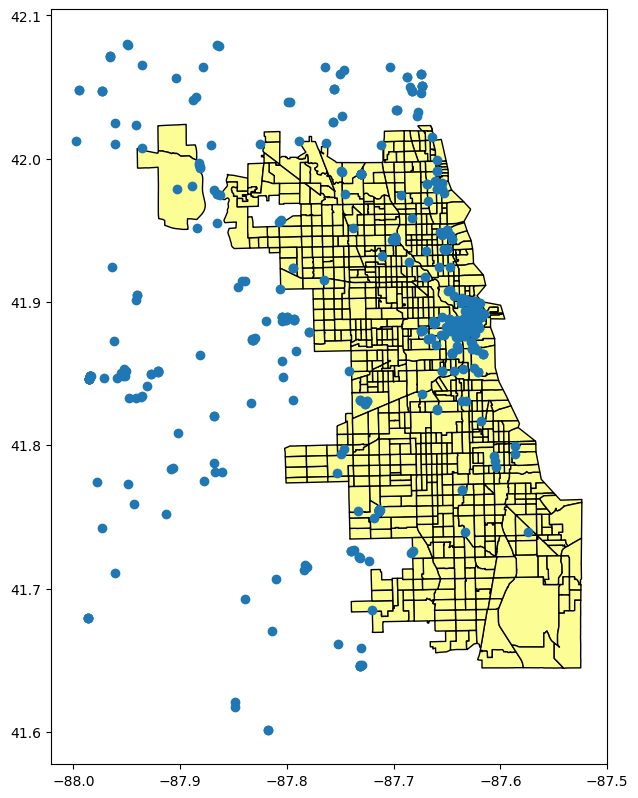

In [16]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='#FDFD96', edgecolor='black')  
cstat_gdf.plot(ax=ax)
plt.show()

In [9]:
chicago_nodes = pd.read_csv('output_node_primary+motorway+ev.csv')
chicago_edges = pd.read_csv('output_edge_primary+motorway.csv')

import geopandas as gpd
from shapely.geometry import LineString
from shapely import wkt

chicago_nodes['geometry'] = chicago_nodes['geometry'].apply(wkt.loads)
gdf_chicago_nodes = gpd.GeoDataFrame(chicago_nodes, crs='epsg:4326')

chicago_edges['front'] = chicago_edges['front'].apply(wkt.loads)
chicago_edges['rear'] = chicago_edges['rear'].apply(wkt.loads)

chicago_edges['geometry'] = chicago_edges.apply(lambda row: LineString([row['front'], row['rear']]), axis=1) #Create a linestring column
gdf_chicago_edges = gpd.GeoDataFrame(chicago_edges, crs='epsg:4326')

gdf_chicago_edges = gdf_chicago_edges.to_crs({'init': 'epsg:3036'})
gdf_chicago_edges['length'] = gdf_chicago_edges.length*0.000621371
gdf_chicago_edges = gdf_chicago_edges.to_crs({'init': 'epsg:4326'})


/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.i

/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


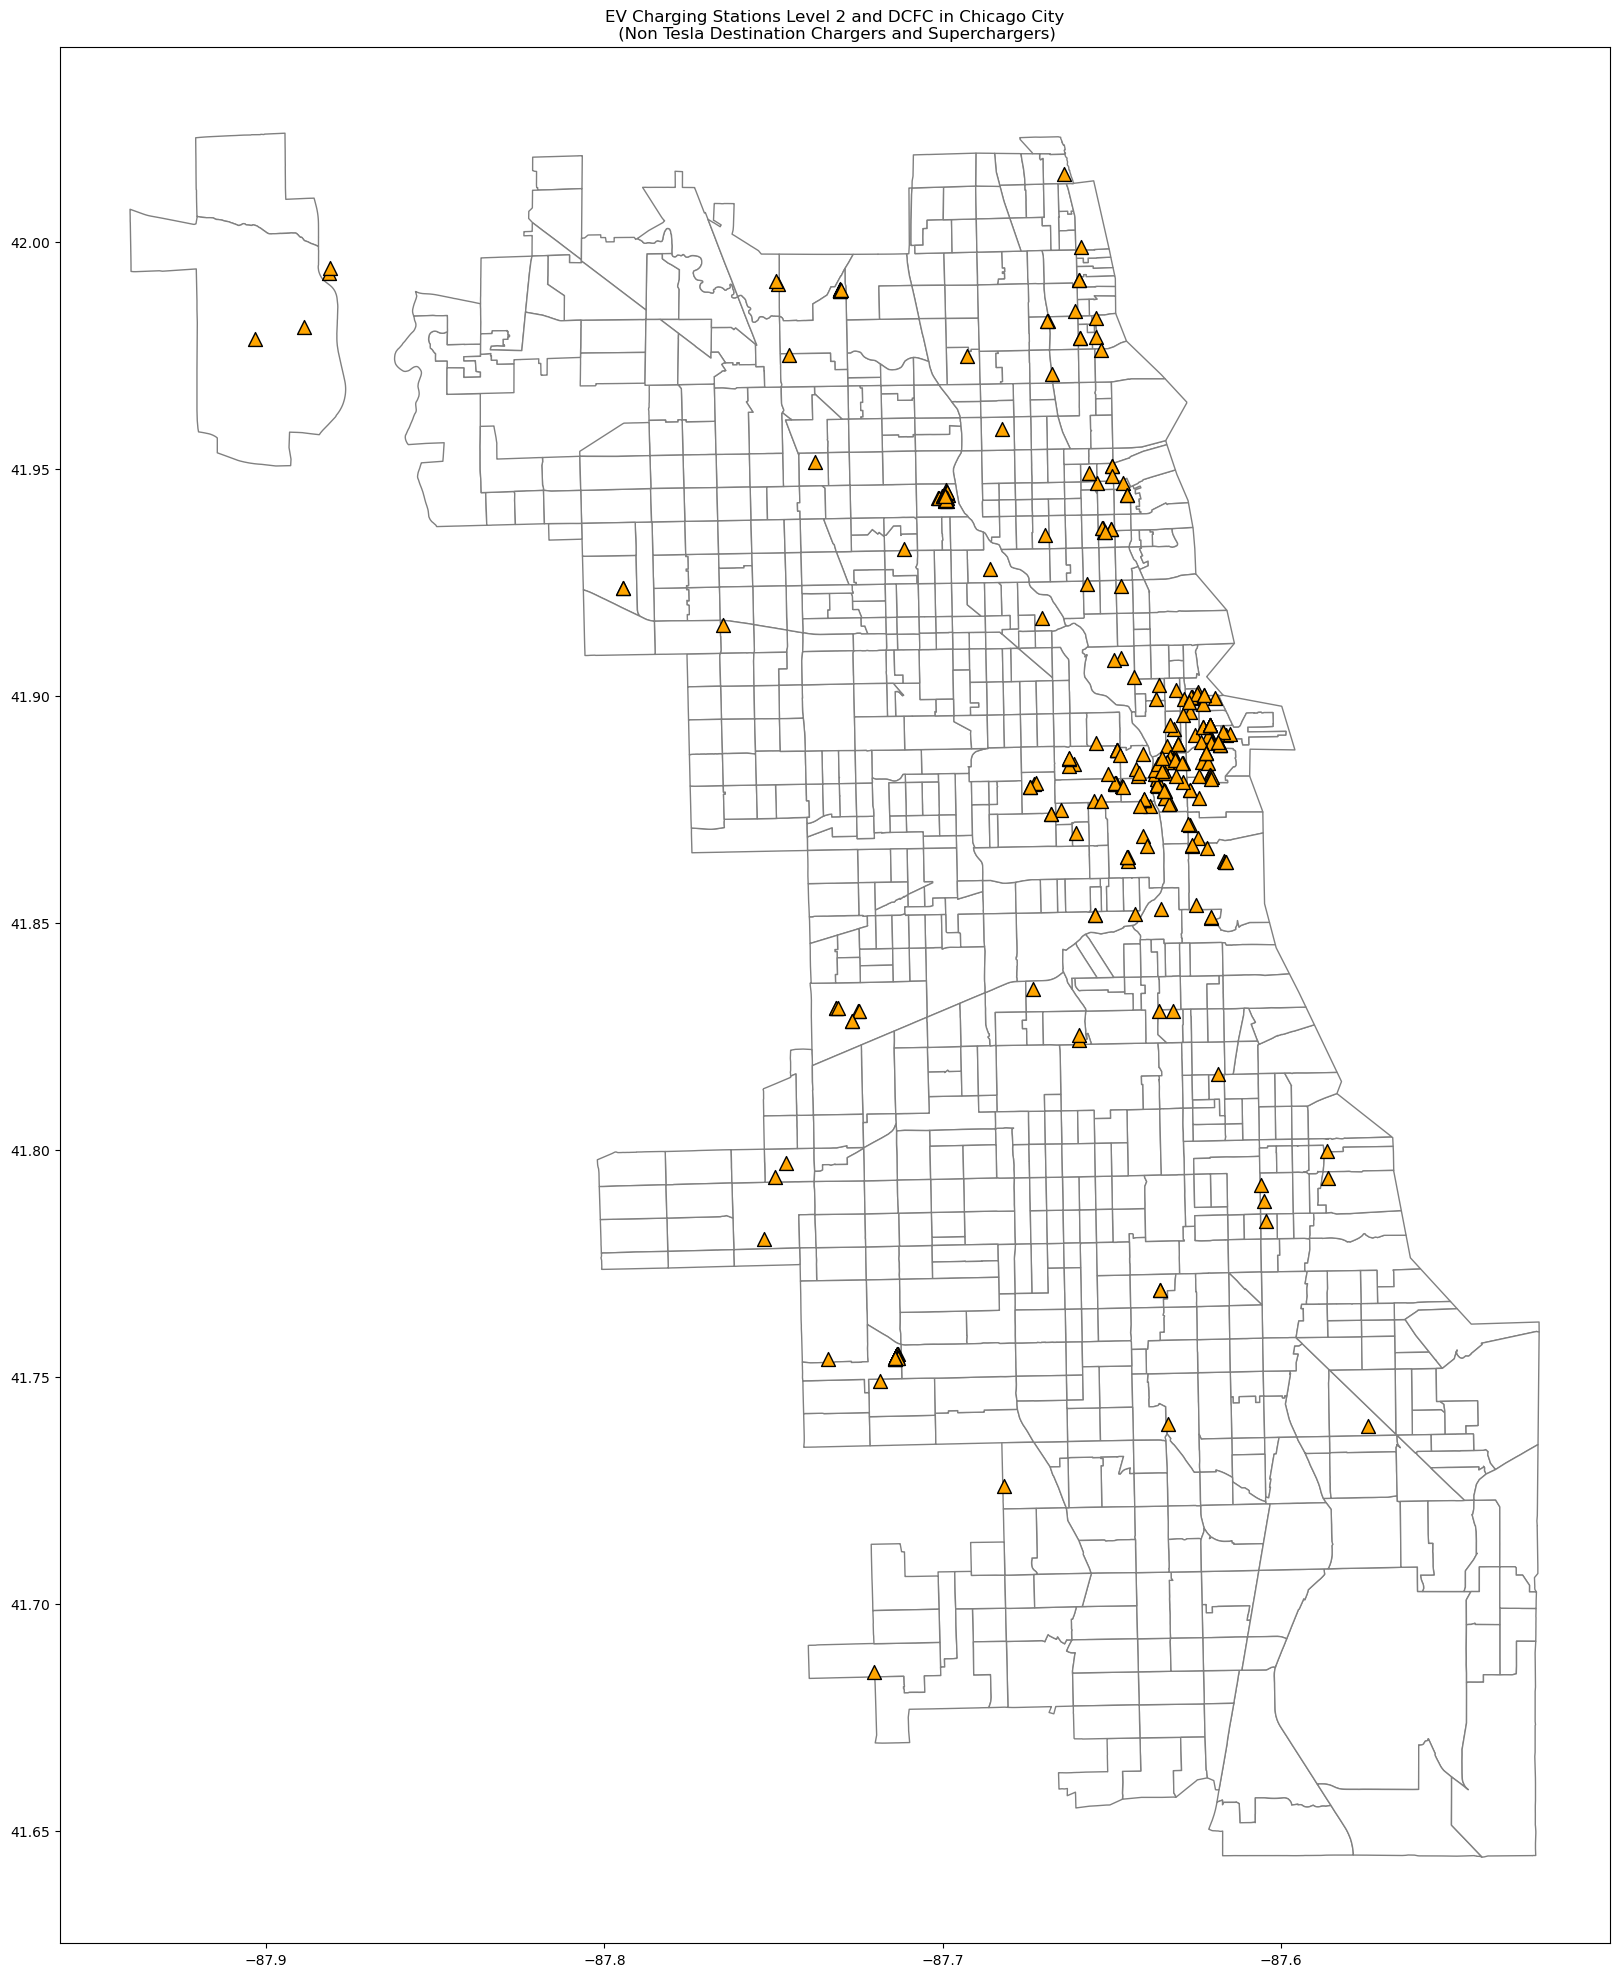

In [42]:
### Chicago Bound
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
bound = gpd.read_file(filename) 
bound.to_crs('epsg:4326')

within_points = gpd.sjoin(cstat_gdf, bound, op='within')

fig, ax = plt.subplots(figsize = (20,40))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='white', edgecolor='#808080')

within_points.plot(ax=ax, marker='^', markersize = 100, edgecolor='k', color = 'orange')

ax.axis('on')
ax.set_title('EV Charging Stations Level 2 and DCFC in Chicago City\n (Non Tesla Destination Chargers and Superchargers)')

#ox.plot_graph(G2, ax=ax, node_color='k', edge_linewidth=1, node_zorder=2)


plt.show()

In [18]:
within_points

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,level2,dcfc,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry,index_right,name,objectid,shape_area,shape_len
2,ELEC,60666,Public - Credit card at all times,24 hours daily; pay lot,6,0,Non-Networked,GPS,41.978506,-87.903280,J1772,POINT (-87.90328 41.97851),0,CHICAGO,1.0,6.450277e+09,845282.931362
18,ELEC,60611,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.899760,-87.626372,J1772,POINT (-87.62637 41.89976),0,CHICAGO,1.0,6.450277e+09,845282.931362
21,ELEC,60661,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.889356,-87.630403,J1772,POINT (-87.63040 41.88936),0,CHICAGO,1.0,6.450277e+09,845282.931362
22,ELEC,60610,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.901213,-87.631134,J1772,POINT (-87.63113 41.90121),0,CHICAGO,1.0,6.450277e+09,845282.931362
25,ELEC,60637,Public,24 hours daily,2,0,ChargePoint Network,GPS,41.788720,-87.605020,J1772,POINT (-87.60502 41.78872),0,CHICAGO,1.0,6.450277e+09,845282.931362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,ELEC,60601,Public,NaN,11,0,Tesla Destination,200-8,41.881747,-87.620555,J1772 TESLA,POINT (-87.62055 41.88175),0,CHICAGO,1.0,6.450277e+09,845282.931362
1047,ELEC,60638,Public,NaN,6,0,Tesla Destination,200-8,41.780364,-87.752853,J1772 TESLA,POINT (-87.75285 41.78036),0,CHICAGO,1.0,6.450277e+09,845282.931362
1080,ELEC,60638,Public,NaN,12,0,Tesla Destination,200-9,41.797210,-87.746390,J1772 TESLA,POINT (-87.74639 41.79721),0,CHICAGO,1.0,6.450277e+09,845282.931362
1088,ELEC,60602,Public,NaN,4,0,Tesla Destination,200-8,41.882312,-87.630943,J1772 TESLA,POINT (-87.63094 41.88231),0,CHICAGO,1.0,6.450277e+09,845282.931362


/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


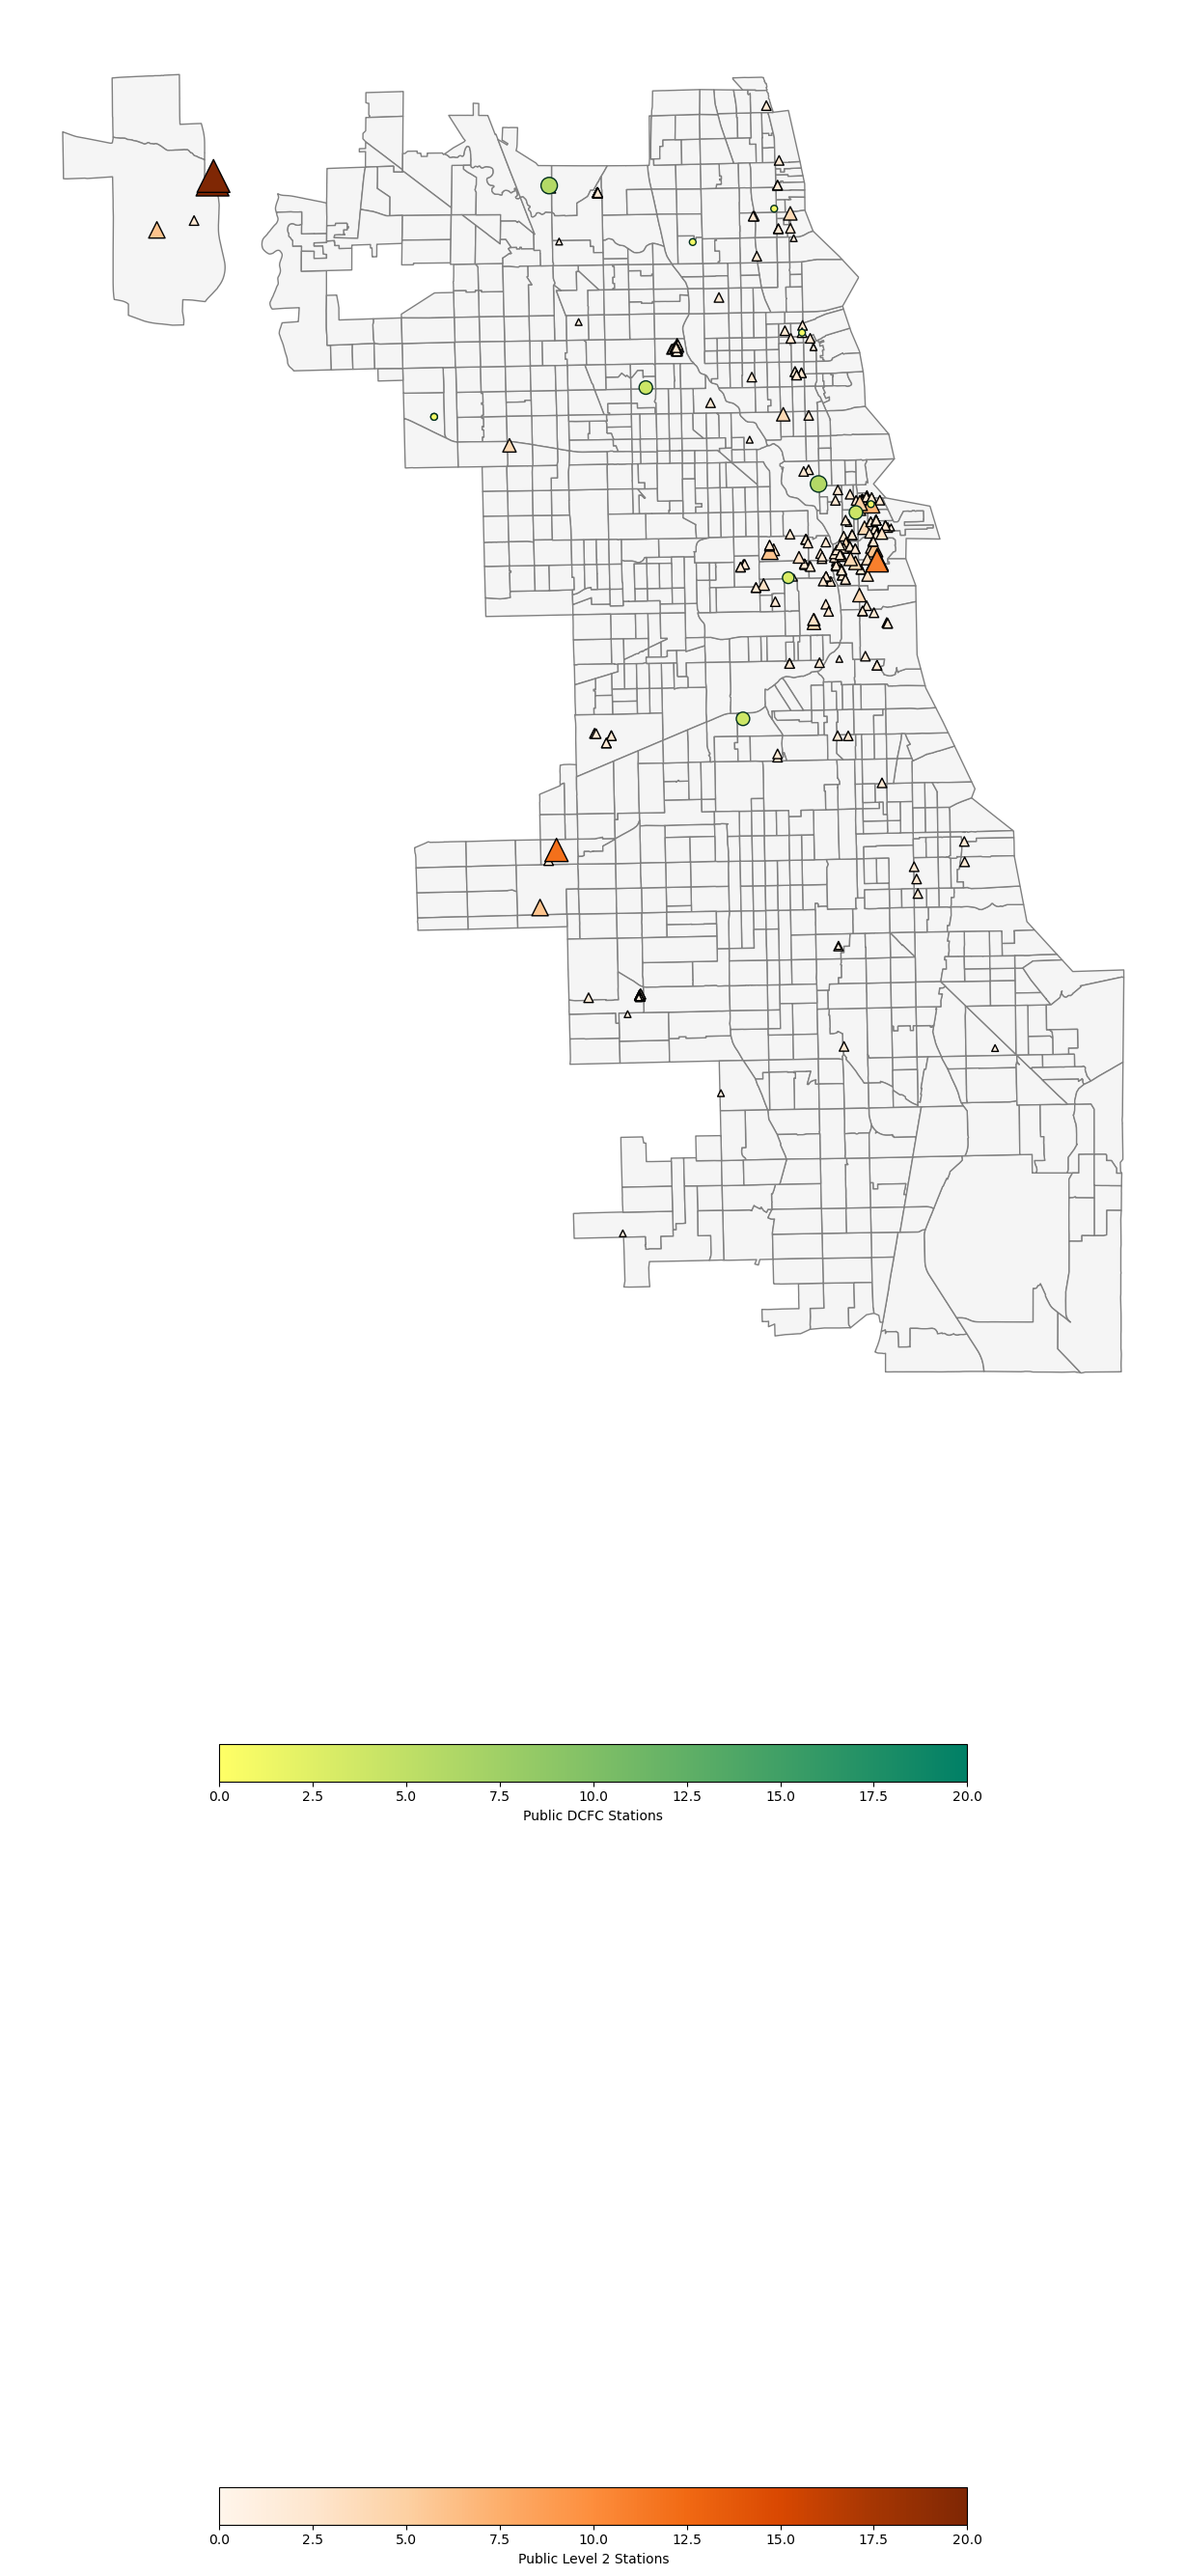

In [65]:
### Chicago Bound
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
bound = gpd.read_file(filename) 
bound.to_crs('epsg:4326')

within_points = gpd.sjoin(cstat_gdf, bound, op='within')

fig, ax = plt.subplots(figsize = (20,40))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='#f5f5f5', edgecolor='grey')

#gdf_chicago_nodes.plot(ax=ax, markersize = 10, color='#808080')
#gdf_chicago_edges.plot(ax=ax,  color='#808080')



within_points.plot(ax=ax, column='level2'   
                    ,cmap='Oranges', markersize= within_points['level2'],
                   marker='^', vmin=0, vmax=20, legend=True, edgecolor='k',
                   legend_kwds={"label": 'Public Level 2 Stations', "shrink":.5, "orientation":"horizontal"})

within_points.plot(ax=ax, column='dcfc',
                        cmap='summer_r', markersize= within_points['dcfc']*100,
                        marker='.', vmin=0, vmax=20, legend=True,edgecolor='#023020',
                        legend_kwds={"label": 'Public DCFC Stations', "shrink":.5, "orientation":"horizontal"})

ax.axis('off')
#ax.set_title('EV Charging Stations Level 2 and DCFC in Chicago City\n (Non Tesla Destination Chargers and Superchargers)')



plt.show()

### Public Tesla Super Charging Stations

In [71]:
tstat_df = pd.read_csv('data/EV_stations_IL/alt_fuel_stations_clean_Tesla (Jan 20 2023).csv')
tstat_gdf = gpd.GeoDataFrame(tstat_df, geometry=gpd.points_from_xy(tstat_df.Longitude, tstat_df.Latitude))
tstat_gdf.crs = {'init': 'epsg:4326'}

tstat_gdf.rename(columns={'EV Level2 EVSE Num': 'level2'}, inplace=True)
tstat_gdf.rename(columns={'EV DC Fast Count': 'dcfc'}, inplace=True)

tstat_gdf = tstat_gdf[tstat_gdf['Longitude'] > -88]
tstat_gdf = tstat_gdf[tstat_gdf['Longitude'] < -87.5]
tstat_gdf = tstat_gdf[tstat_gdf['Latitude'] < 42.1]
tstat_gdf = tstat_gdf[tstat_gdf['Latitude'] > 41.6]


/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [77]:
tstat_gdf = tstat_gdf[tstat_gdf['dcfc'] > 0]
tstat_gdf.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,level2,dcfc,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry
4,ELEC,60607,Public,24 hours daily; for Tesla use only,0,14,Tesla,200-9,41.869126,-87.639971,TESLA,POINT (-87.63997 41.86913)
5,ELEC,60601,Public,24 hours daily; for Tesla use only,0,10,Tesla,200-9,41.886510,-87.619720,TESLA,POINT (-87.61972 41.88651)
6,ELEC,60657,Public,24 hours daily; for Tesla use only,0,8,Tesla,200-9,41.937552,-87.644709,TESLA,POINT (-87.64471 41.93755)
9,ELEC,60025,Public,24 hours daily; for Tesla use only,0,10,Tesla,200-9,42.077163,-87.860828,TESLA,POINT (-87.86083 42.07716)
12,ELEC,60008,Public,24 hours daily; for Tesla use only,0,22,Tesla,200-9,42.049832,-87.994959,TESLA,POINT (-87.99496 42.04983)


/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


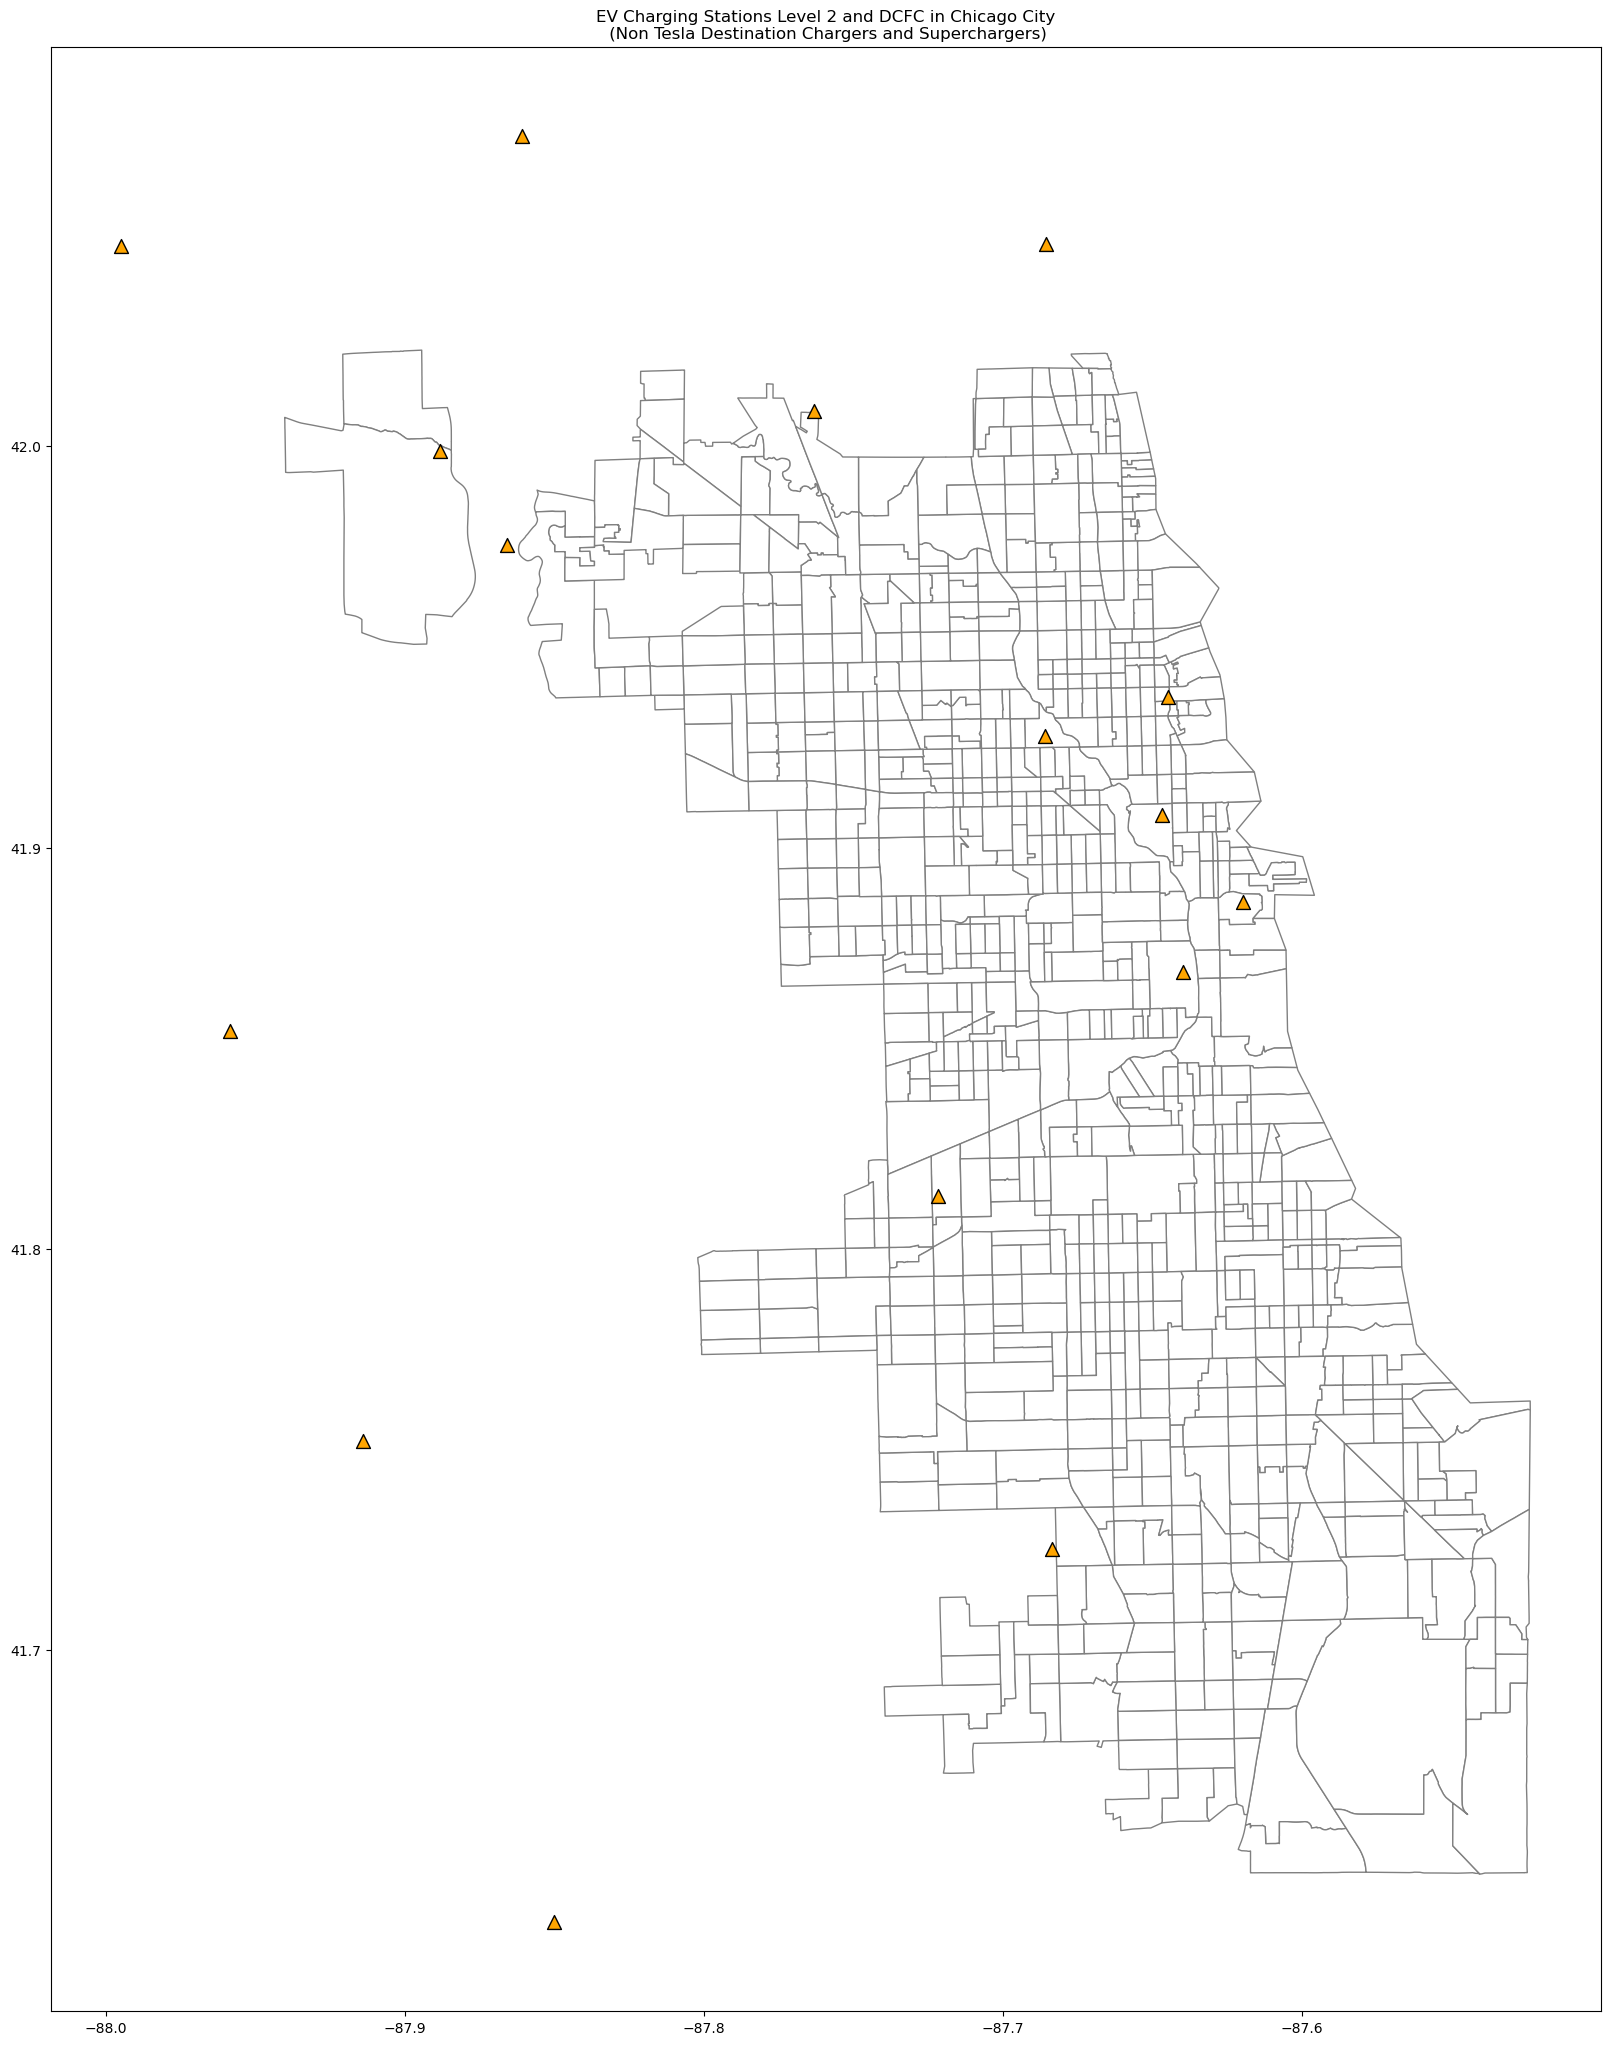

In [78]:
### Chicago Bound
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
bound = gpd.read_file(filename) 
bound.to_crs('epsg:4326')

fig, ax = plt.subplots(figsize = (20,40))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='white', edgecolor='#808080')

tstat_gdf.plot(ax=ax, marker='^', markersize = 100, edgecolor='k', color = 'orange')

ax.axis('on')
ax.set_title('EV Charging Stations Level 2 and DCFC in Chicago City\n (Non Tesla Destination Chargers and Superchargers)')

#ox.plot_graph(G2, ax=ax, node_color='k', edge_linewidth=1, node_zorder=2)


plt.show()

/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


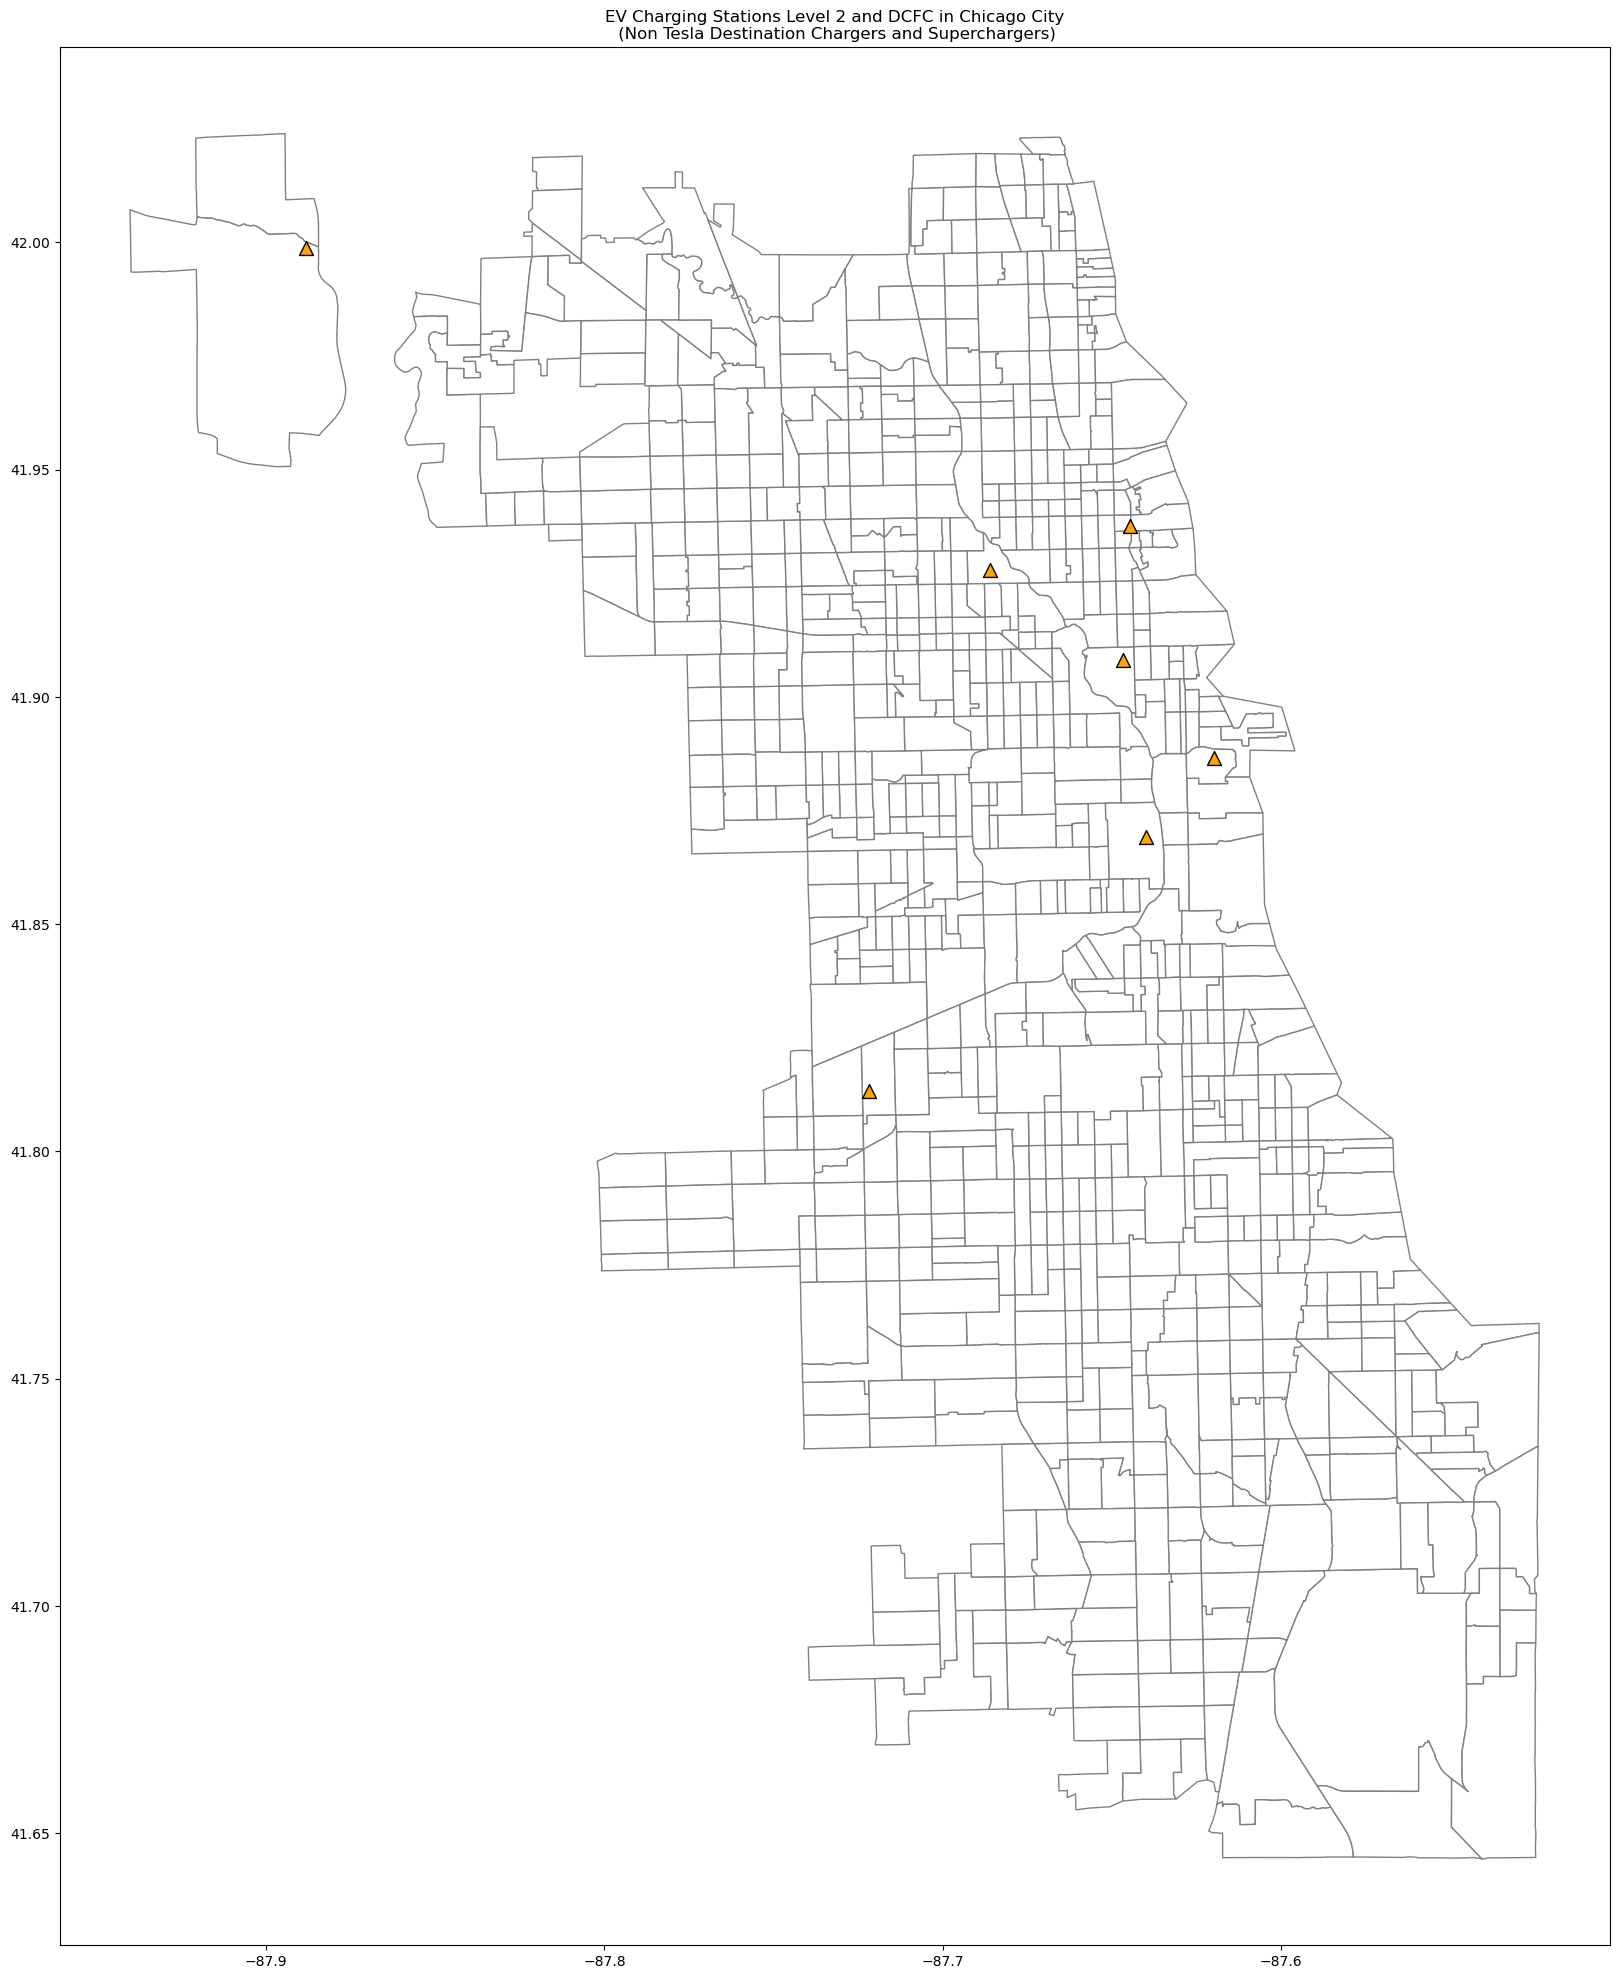

In [79]:
### Chicago Bound
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
bound = gpd.read_file(filename) 
bound.to_crs('epsg:4326')

t_within_points = gpd.sjoin(tstat_gdf, bound, op='within')

fig, ax = plt.subplots(figsize = (20,40))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='white', edgecolor='#808080')

t_within_points.plot(ax=ax, marker='^', markersize = 100, edgecolor='k', color = 'orange')

ax.axis('on')
ax.set_title('EV Charging Stations Level 2 and DCFC in Chicago City\n (Non Tesla Destination Chargers and Superchargers)')

#ox.plot_graph(G2, ax=ax, node_color='k', edge_linewidth=1, node_zorder=2)


plt.show()

In [80]:
t_within_points.head()

,Fuel Type Code,ZIP,Groups With Access Code,Access Days Time,level2,dcfc,EV Network,Geocode Status,Latitude,Longitude,EV Connector Types,geometry,index_right,name,objectid,shape_area,shape_len
4,ELEC,60607,Public,24 hours daily; for Tesla use only,0,14,Tesla,200-9,41.869126,-87.639971,TESLA,POINT (-87.63997 41.86913),0,CHICAGO,1.0,6.450277e+09,845282.931362
5,ELEC,60601,Public,24 hours daily; for Tesla use only,0,10,Tesla,200-9,41.886510,-87.619720,TESLA,POINT (-87.61972 41.88651),0,CHICAGO,1.0,6.450277e+09,845282.931362
6,ELEC,60657,Public,24 hours daily; for Tesla use only,0,8,Tesla,200-9,41.937552,-87.644709,TESLA,POINT (-87.64471 41.93755),0,CHICAGO,1.0,6.450277e+09,845282.931362
83,ELEC,60610,Public,24 hours daily; for Tesla use only,0,10,Tesla,GPS,41.908065,-87.646836,TESLA,POINT (-87.64684 41.90807),0,CHICAGO,1.0,6.450277e+09,845282.931362
98,ELEC,60666,Public,24 hours daily; for Tesla use only,0,14,Tesla,GPS,41.998752,-87.888342,TESLA,POINT (-87.88834 41.99875),0,CHICAGO,1.0,6.450277e+09,845282.931362


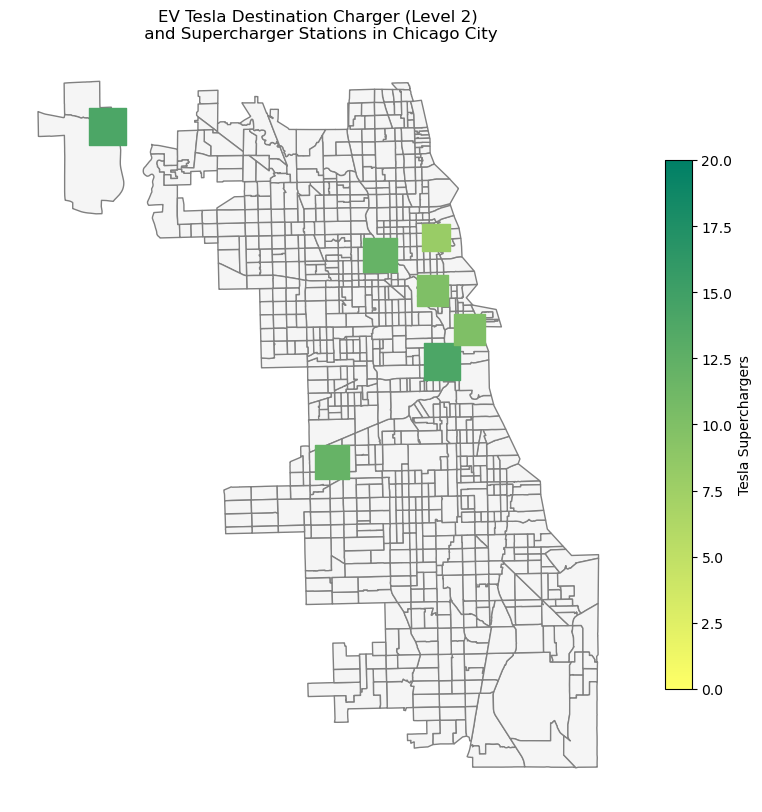

In [87]:
### Chicago Bound
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='#f5f5f5', edgecolor='#808080')  

t_within_points.plot(ax=ax, column='dcfc'   
                    ,cmap='summer_r', markersize= t_within_points['dcfc']*50,
                   marker='s', vmin=0, vmax=20, legend=True,
                   legend_kwds={"label": 'Tesla Superchargers', "shrink":.70})

ax.axis('off')
ax.set_title('EV Tesla Destination Charger (Level 2)\n and Supercharger Stations in Chicago City')
plt.show()

# FINAL Figure

/Users/denissapurba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


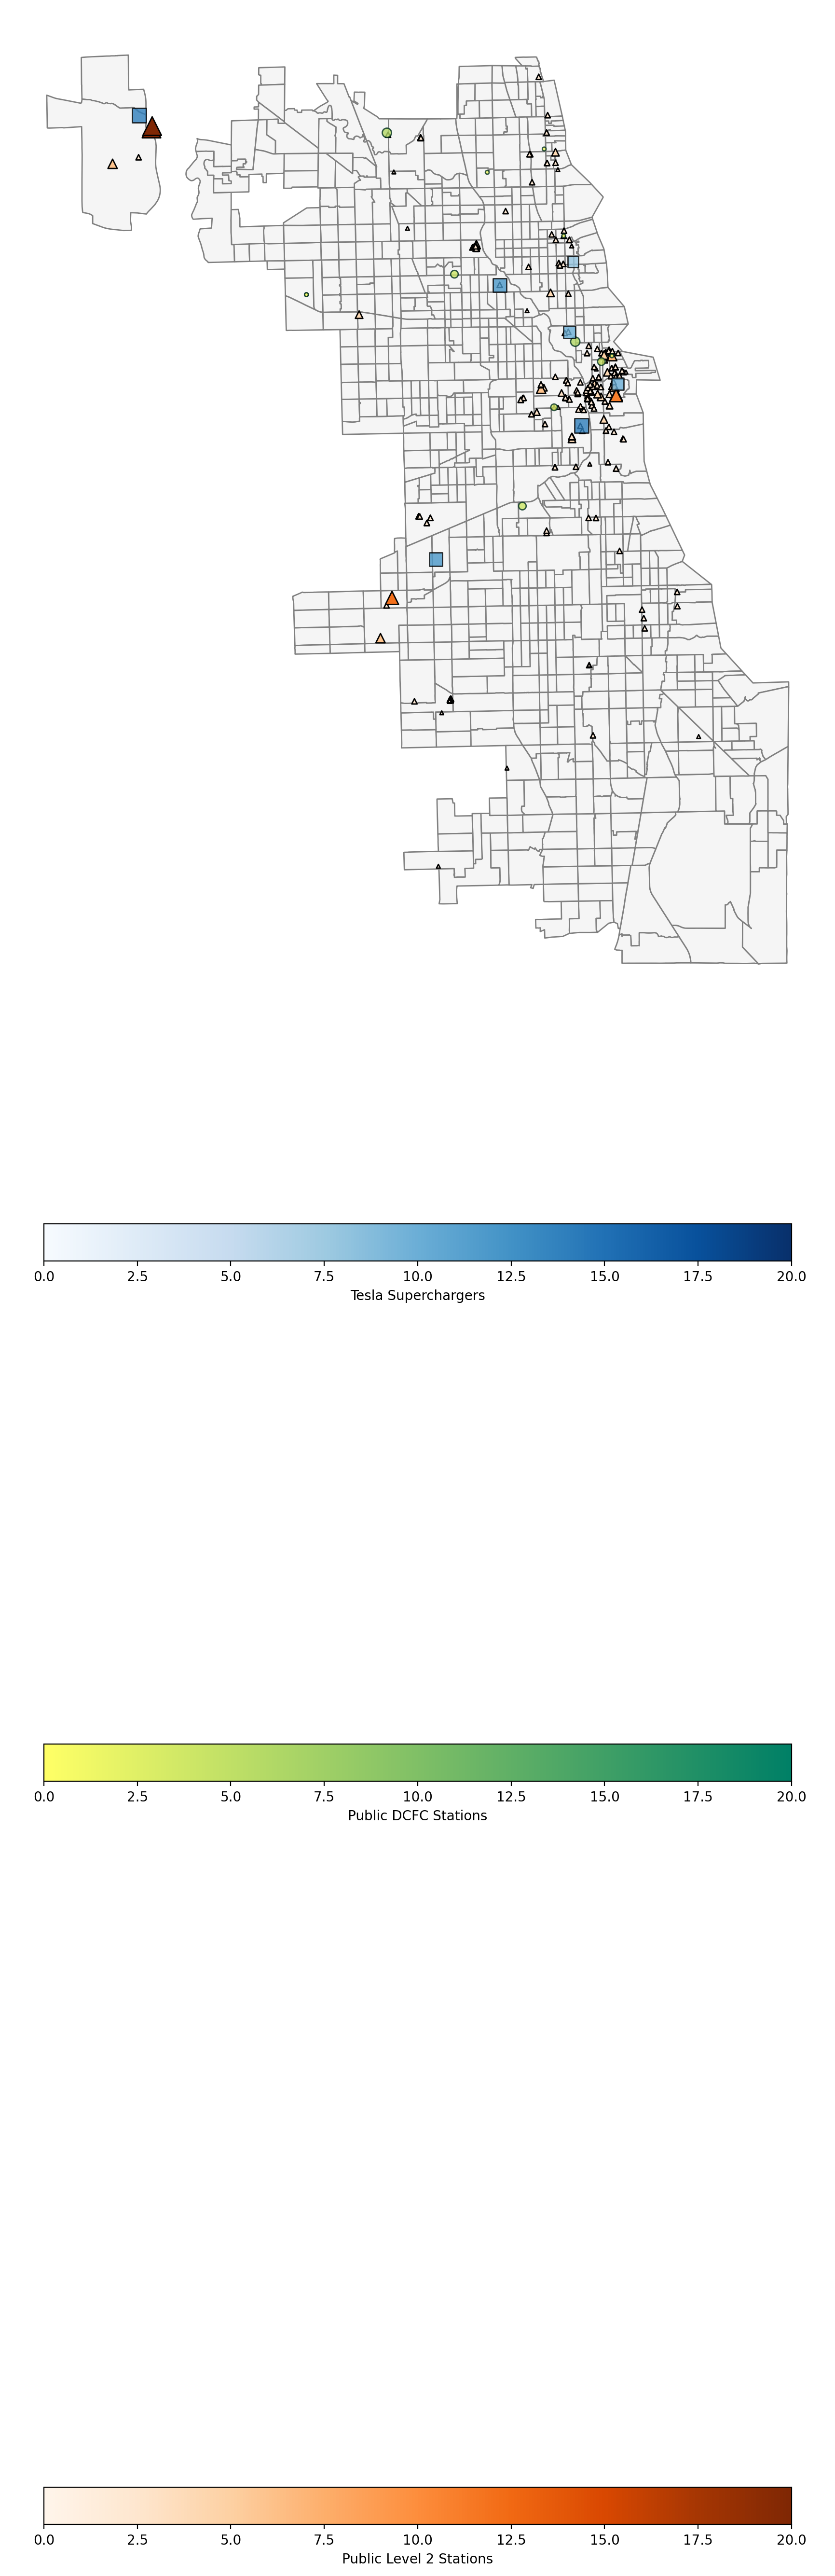

In [120]:
### Chicago Bound
filename = 'data/Boundaries - City/geo_export_5f554ba9-0da0-4deb-91a0-6c6eec7355c5.shp'
bound = gpd.read_file(filename) 
bound.to_crs('epsg:4326')

within_points = gpd.sjoin(cstat_gdf, bound, op='within')

fig, ax = plt.subplots(figsize = (20,40))
plt.rcParams['figure.dpi'] = 200
tract_df.plot(ax=ax, color='#f5f5f5', edgecolor='grey')

#gdf_chicago_nodes.plot(ax=ax, markersize = 10, color='#808080')
#gdf_chicago_edges.plot(ax=ax,  color='#808080')



within_points.plot(ax=ax, column='level2'   
                    ,cmap='Oranges', markersize= within_points['level2']*8,
                   marker='^', vmin=0, vmax=20, legend=True, edgecolor='k',
                   legend_kwds={"label": 'Public Level 2 Stations', "shrink":.5, "orientation":"horizontal"})

within_points.plot(ax=ax, column='dcfc',
                        cmap='summer_r', markersize= within_points['dcfc']*8,
                        marker='o', vmin=0, vmax=20, legend=True,edgecolor='#023020', alpha=0.8,
                        legend_kwds={"label": 'Public DCFC Stations', "shrink":.5, "orientation":"horizontal"})

t_within_points.plot(ax=ax, column='dcfc'   
                    ,cmap='Blues', markersize= t_within_points['dcfc']*8,
                   marker='s', vmin=0, vmax=20, legend=True,edgecolor='k', alpha=0.8,
                   legend_kwds={"label": 'Tesla Superchargers', "shrink":.5, "orientation":"horizontal"})

ax.axis('off')
#ax.set_title('EV Charging Stations Level 2 and DCFC in Chicago City\n (Non Tesla Destination Chargers and Superchargers)')



plt.show()

In [130]:
num = len(within_points[within_points['level2']>0])
avg_host = sum(within_points[within_points['level2']>0]['level2'])/num

print(num)
print(avg_host)

287
2.3205574912891986


In [132]:
num = len(within_points[within_points['dcfc']>0])
avg_host = sum(within_points[within_points['dcfc']>0]['dcfc'])/num

print(num)
print(avg_host)

12
2.75


In [133]:
num = len(t_within_points[t_within_points['dcfc']>0])
avg_host = sum(t_within_points[t_within_points['dcfc']>0]['dcfc'])/num

print(num)
print(avg_host)

7
11.428571428571429
